Dataset Head:
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  

Missing Values:
customer_id         0
credit_score        0
country             0
gender              0
age 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Performance Metrics Without MKL:

Decision Tree:
Accuracy: 0.7815
Precision: 0.45132743362831856
Recall: 0.5190839694656488
F1 Score: 0.4828402366863905
Training Time: 0.04911613464355469
Prediction Time: 0.005494832992553711

KNN:
Accuracy: 0.8355
Precision: 0.6379310344827587
Recall: 0.37659033078880405
F1 Score: 0.47359999999999997
Training Time: 0.008565902709960938
Prediction Time: 0.10243797302246094

Random Forest:
Accuracy: 0.8635
Precision: 0.7479338842975206
Recall: 0.46055979643765904
F1 Score: 0.5700787401574803
Training Time: 0.7213819026947021
Prediction Time: 0.028671979904174805

Gradient Boosting:
Accuracy: 0.8635
Precision: 0.7362204724409449
Recall: 0.4758269720101781
F1 Score: 0.5780525502318392
Training Time: 1.006730079650879
Prediction Time: 0.007782936096191406

SVM:
Accuracy: 0.8035
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Training Time: 0.5225598812103271
Prediction Time: 0.08162569999694824

Performance Metrics With MKL:

Decision Tree:
Accuracy: 0.7815
Preci

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


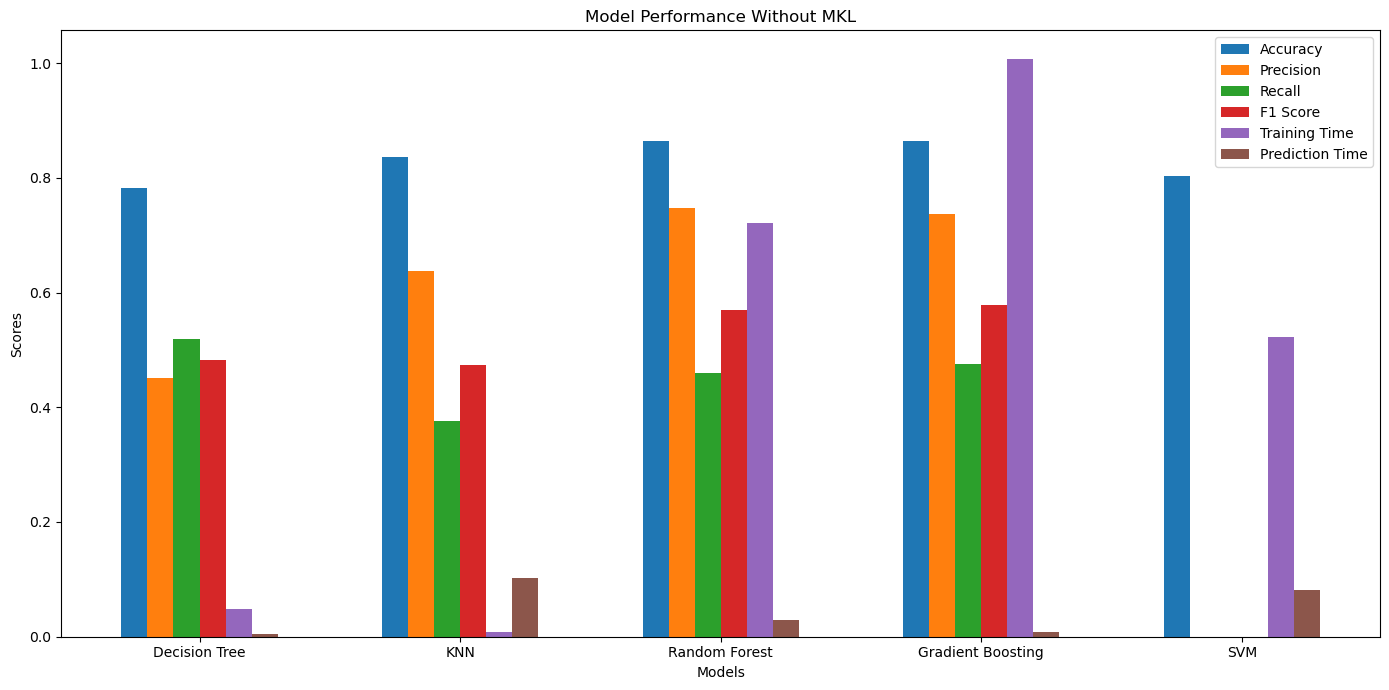

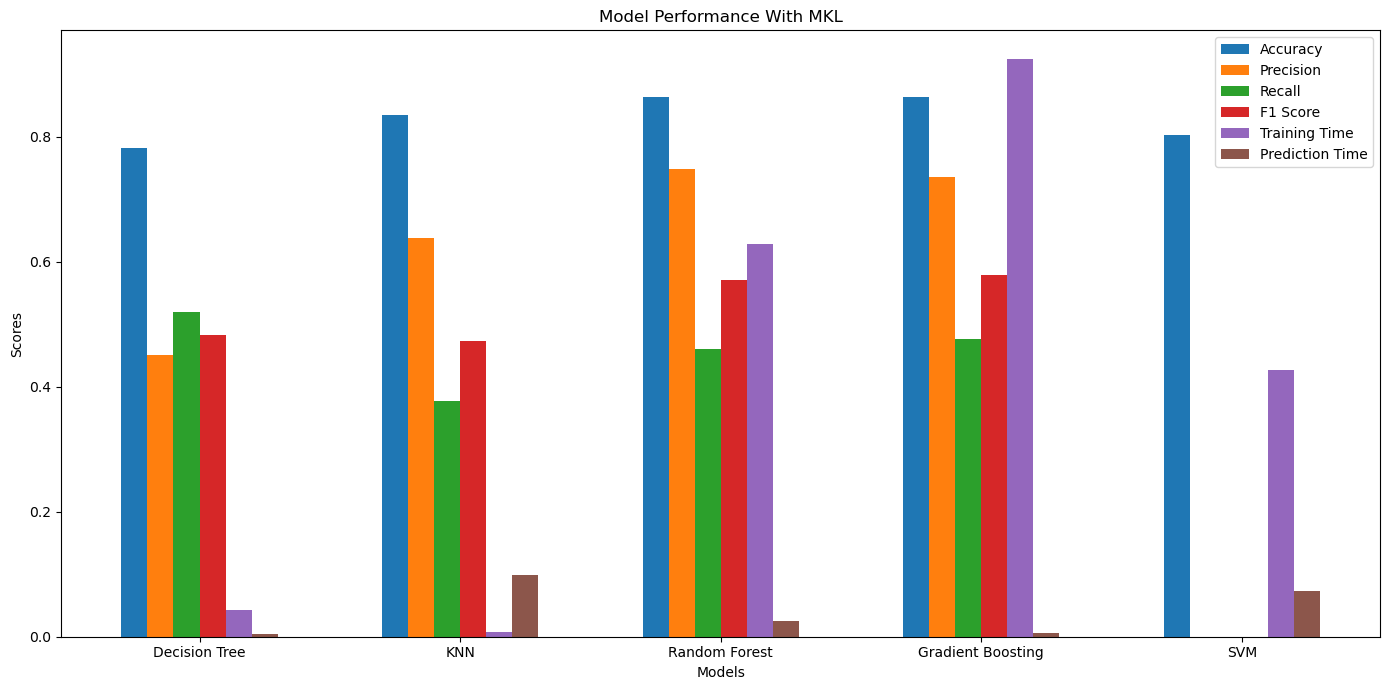

In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time


data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')


print("Dataset Head:")
print(data.head())


print("\nMissing Values:")
print(data.isnull().sum())


X = data.iloc[:, :-1]
y = data.iloc[:, -1]


categorical_features = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=['object']).columns),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Initialize models without MKL
models_no_mkl = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models without MKL
metrics_no_mkl = {}
for model_name, model in models_no_mkl.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    accuracy, precision, recall, f1 = evaluate_model_performance(pipeline, X_test, y_test)
    prediction_time = time.time() - start_time
    
    metrics_no_mkl[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Training Time": training_time,
        "Prediction Time": prediction_time
    }


models_mkl = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}


metrics_mkl = {}
for model_name, model in models_mkl.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    accuracy, precision, recall, f1 = evaluate_model_performance(pipeline, X_test, y_test)
    prediction_time = time.time() - start_time
    
    metrics_mkl[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Training Time": training_time,
        "Prediction Time": prediction_time
    }


print("Performance Metrics Without MKL:")
for model_name, metrics in metrics_no_mkl.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

print("\nPerformance Metrics With MKL:")
for model_name, metrics in metrics_mkl.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


plt.figure(figsize=(14, 7))
metrics_names = ["Accuracy", "Precision", "Recall", "F1 Score", "Training Time", "Prediction Time"]
models = list(models_no_mkl.keys())
values_no_mkl = [[metrics_no_mkl[model][metric] for model in models] for metric in metrics_names]

x = np.arange(len(models))
width = 0.1

for i, metric in enumerate(metrics_names):
    plt.bar(x + i * width, values_no_mkl[i], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Without MKL')
plt.xticks(x + width * 2.5, models)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))
values_mkl = [[metrics_mkl[model][metric] for model in models] for metric in metrics_names]

x = np.arange(len(models))

for i, metric in enumerate(metrics_names):
    plt.bar(x + i * width, values_mkl[i], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance With MKL')
plt.xticks(x + width * 2.5, models)
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib seaborn scikit-learn-intelex

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model performance
def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Initialize models without Intelex
models_no_intelex = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models without Intelex
metrics_no_intelex = {}
for model_name, model in models_no_intelex.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    accuracy, precision, recall, f1 = evaluate_model_performance(model, X_test, y_test)
    prediction_time = time.time() - start_time
    
    metrics_no_intelex[model_name] = {
        "Accuracy": accuracy,
        "Training Time": training_time,
        "Prediction Time": prediction_time
    }

# Enable Intelex optimizations
from sklearnex import patch_sklearn
patch_sklearn()

# Initialize models with Intelex
models_intelex = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

# Train and evaluate models with Intelex
metrics_intelex = {}
for model_name, model in models_intelex.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    accuracy, precision, recall, f1 = evaluate_model_performance(model, X_test, y_test)
    prediction_time = time.time() - start_time
    
    metrics_intelex[model_name] = {
        "Accuracy": accuracy,
        "Training Time": training_time,
        "Prediction Time": prediction_time
    }

# Display performance metrics
print("Performance Metrics Without Intelex:")
for model_name, metrics in metrics_no_intelex.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

print("\nPerformance Metrics With Intelex:")
for model_name, metrics in metrics_intelex.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

# Calculate speed-up ratios
speed_up_ratios = {}
for model_name in models_no_intelex.keys():
    training_time_ratio = metrics_no_intelex[model_name]["Training Time"] / metrics_intelex[model_name]["Training Time"]
    prediction_time_ratio = metrics_no_intelex[model_name]["Prediction Time"] / metrics_intelex[model_name]["Prediction Time"]
    speed_up_ratios[model_name] = {
        "Training Time Speed-Up": training_time_ratio,
        "Prediction Time Speed-Up": prediction_time_ratio
    }

# Display speed-up ratios
print("\nSpeed-Up Ratios With Intelex:")
for model_name, ratios in speed_up_ratios.items():
    print(f"\n{model_name}:")
    for ratio_name, value in ratios.items():
        print(f"{ratio_name}: {value}")

# Prepare data for visualization
metrics_names = ["Accuracy", "Training Time", "Prediction Time"]
models = list(models_no_intelex.keys())
values_no_intelex = [[metrics_no_intelex[model][metric] for model in models] for metric in metrics_names]
values_intelex = [[metrics_intelex[model][metric] for model in models] for metric in metrics_names]

# Bar Plot for Accuracy, Training Time, and Prediction Time
plt.figure(figsize=(14, 7))
x = np.arange(len(models))
width = 0.3

for i, metric in enumerate(metrics_names):
    plt.bar(x + i * width - width, values_no_intelex[i], width, label=f'{metric} (No Intelex)')
    plt.bar(x + i * width, values_intelex[i], width, label=f'{metric} (Intelex)')

plt.xlabel('Models')
plt.ylabel('Scores / Time (seconds)')
plt.title('Model Performance With and Without Intelex')
plt.xticks(x + width / 2, models)
plt.legend()
plt.tight_layout()
plt.show()

# Line Plot for Speed-Up Ratios
plt.figure(figsize=(14, 7))
speed_up_metrics = ["Training Time Speed-Up", "Prediction Time Speed-Up"]
speed_up_values = [[speed_up_ratios[model][metric] for model in models] for metric in speed_up_metrics]

for i, metric in enumerate(speed_up_metrics):
    plt.plot(models, speed_up_values[i], label=metric, marker='o')

plt.xlabel('Models')
plt.ylabel('Speed-Up Ratio')
plt.title('Speed-Up Ratios With Intelex')
plt.legend()
plt.tight_layout()
plt.show()

# Heatmap for detailed comparison
metrics_all = ['Accuracy', 'Training Time', 'Prediction Time']
heatmap_data_no_intelex = pd.DataFrame(metrics_no_intelex).T[metrics_all].values
heatmap_data_intelex = pd.DataFrame(metrics_intelex).T[metrics_all].values

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(heatmap_data_no_intelex, annot=True, ax=ax[0], cmap="YlGnBu", xticklabels=metrics_all, yticklabels=models)
ax[0].set_title('Performance Metrics Heatmap Without Intelex')
sns.heatmap(heatmap_data_intelex, annot=True, ax=ax[1], cmap="YlGnBu", xticklabels=metrics_all, yticklabels=models)
ax[1].set_title('Performance Metrics Heatmap With Intelex')
plt.show()


ERROR: Could not find a version that satisfies the requirement scikit-learn-intelex (from versions: none)
ERROR: No matching distribution found for scikit-learn-intelex


ModuleNotFoundError: No module named 'sklearnex'